# MLS Tasks 2020

Slawomir Sowa<br>
G00375619@gmit.ie
***

### Task 1: Square root of 2 to 100 places
#### Description:

#### Research:

Square root of a number $x$ is a number $y$ that $ y^2 = x$. <em>[1]</em>

$$ y = \sqrt{x} $$
    
[1] Wikipedia; Square root; https://en.wikipedia.org/wiki/Square_root

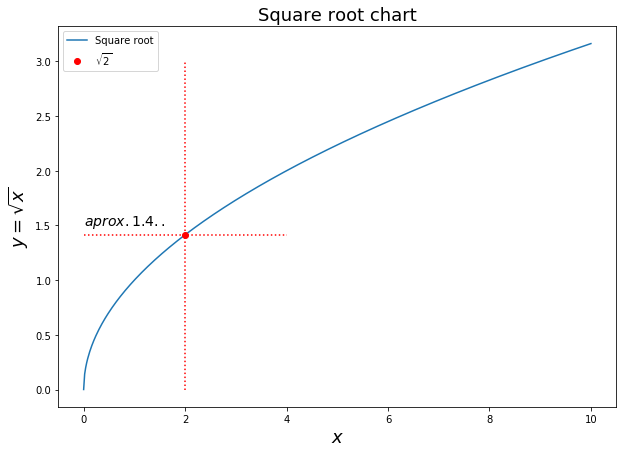

In [2]:
# plot a chart of square root
import matplotlib.pyplot as plt
import numpy as np

# generate evenly spaced numbers between 0 and 10
x = np.linspace(0,10,500)

# using numby module sqrt calculate square root of generated numbers 
y = np.sqrt(x)

# adjust plot size 
plt.figure(figsize=(10,7))

# generate plot
plt.plot(x,y,label="Square root")
plt.plot([2,2],[0,3],":r")
plt.plot([0,4],[np.sqrt(2),np.sqrt(2)],":r")
plt.plot(2,np.sqrt(2),"ro",  markersize=6, label="$ \sqrt{2}$")


# add title and axes
plt.title("Square root chart",fontsize = 18 )
plt.xlabel("$x$",fontsize = 18)
plt.ylabel("$y = \sqrt{x}$",fontsize = 18)

# add text to plot
plt.text(0,1.5,"$aprox. 1.4..$", fontsize = 14)

# show legend
plt.legend()


The red marker on the chart is our topic for calculation. Our task is to calculate $\sqrt{2}$  to 100 decimal places.

I started by searching Google for methods to manually calculate the square root. I found a post on Quora <em>[2]</em> that describes many different methods, among others Newton's Method.<br>
Newton Method was described as
>Newton's method can get you a good estimate quickly, and if you were going to write a computer program to take the square root, Newton's method would be a good way to go.

Newton's Definition in wikipedia <em>[3]</em>:
>In numerical analysis, Newton's method, also known as the Newton–Raphson method, named after Isaac Newton and Joseph Raphson, is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function. 





[2] Quora; Methods to calculate square root ; https://www.quora.com/What-is-the-method-to-calculate-a-square-root-by-hand<br>
[3] Wikipedia; Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method


The method can be described by the formula <em>[3]</em>:
$$ x_{k+1} = x_{k}- \frac{f(x_{k})}{f'(x_{k})} $$

Using this formula we can calculate the approximate square root <em>[4]</em>.

$$ \sqrt{a} = x \Leftrightarrow a = x^2  \Leftrightarrow x^2 - a = 0 $$ 

Then:

$$ f(x) = x^2 - a $$

and derivative function:
$$ f'(x) = 2x $$

So now our equation is in the form:

$$ x_{k+1} = x_{k}- \frac{x_k^2 - a}{2x_k} $$
<br>

$$ x_{k+1} = \frac{1}{2}(x_k + \frac{a}{x_k})$$

Let's calculate the $\sqrt{2}$ manually.

Our $a=2$ and from the graph we can read that our point is close to $x_0 = 1.5$


$$x_1 = \frac{1}{2}(1.5 + \frac{2}{1.5}) \approx 1.416666$$ <br>

The next step is to take the result and use it to find a closer approximation to the root.<br>

$$x_2 = \frac{1}{2}(1.416666 + \frac{2}{1.416666}) \approx 1.414214$$

We could continue computing until we find a satisfactory approximation.

[4] Square Roots via Newton’s Method; S. G. Johnson, MIT Course February 4, 2015; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf
